* Name: Kale Aniket
* Topic : Decision Tree

In [1]:
# first we will load all the important libraries
import pandas as pd
from sklearn import cross_validation, metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [2]:
usecols = ["Buying", "Maintenance" , "Doors" , "Persons" , "Lug-Boot" , "Safety", "Class"]
data = pd.read_csv("car.data.txt", names=usecols)
data.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# first Let me see the shape of data
data.shape
# so total we have 1728 rows and 7 columns

(1728, 7)

In [4]:
# Any Missing values in datasets
data.isnull().sum()

Buying         0
Maintenance    0
Doors          0
Persons        0
Lug-Boot       0
Safety         0
Class          0
dtype: int64

In [5]:
# ohh!! we dont have any missing values in dataset. but in real world that not going to happen
# lets observe the target variable
data.Class.value_counts()


unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64

In [6]:
# we have 4 classes of target variable. we need to convert them into the numbers.
le = preprocessing.LabelEncoder()
data["Class"] = le.fit_transform(data.Class)
data.head(10)

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,2
1,vhigh,vhigh,2,2,small,med,2
2,vhigh,vhigh,2,2,small,high,2
3,vhigh,vhigh,2,2,med,low,2
4,vhigh,vhigh,2,2,med,med,2
5,vhigh,vhigh,2,2,med,high,2
6,vhigh,vhigh,2,2,big,low,2
7,vhigh,vhigh,2,2,big,med,2
8,vhigh,vhigh,2,2,big,high,2
9,vhigh,vhigh,2,4,small,low,2


In [7]:
# just wanted to confirm we are not missing any values in Class
data.Class.value_counts()

2    1210
0     384
1      69
3      65
Name: Class, dtype: int64

In [8]:
# we will declared the Features and y
#features = data.columns
#features = features.drop(["Class"])
#X = data[features]
#y = data["Class"]


In [9]:
# so we will get dummies one by one cols
features = list(data.columns)
features.remove("Class")
for f in features:
    print(f)
    data[f] = pd.get_dummies(data[f])

Buying
Maintenance
Doors
Persons
Lug-Boot
Safety


In [10]:
data.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,0,0,1,1,0,0,2
1,0,0,1,1,0,0,2
2,0,0,1,1,0,1,2
3,0,0,1,1,0,0,2
4,0,0,1,1,0,0,2


In [11]:
X = data[features]
y = data["Class"]
print(X.shape)
print(y.shape)

(1728, 6)
(1728,)


In [12]:
# now we will Find out the important features from datasets
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
# fit the model
forest.fit(X,y)

importance = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importance)[::-1]
print("Feature Ranking :")
for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) "% (f+1, indices[f], features[indices[f]], importance[indices[f]]))
        

Feature Ranking :
1. feature 3 - Persons (0.535159) 
2. feature 5 - Safety (0.321507) 
3. feature 4 - Lug-Boot (0.047393) 
4. feature 0 - Buying (0.046232) 
5. feature 1 - Maintenance (0.029131) 
6. feature 2 - Doors (0.020578) 


<Container object of 6 artists>

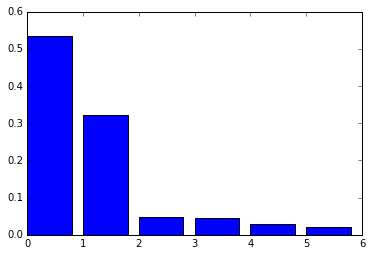

In [13]:
plt.bar(range(X.shape[1]), importance[indices])   

# Now Next we will implement Decision Tree

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
Dt = DecisionTreeClassifier()
clf = Dt.fit(X_train,y_train)
y_pred = clf.predict(X_test)
Accuracy = metrics.accuracy_score(y_test,y_pred)
Accuracy

0.72916666666666663

In [15]:
# at the end we got Accuracy around 72 Percent. which is not bad than random guess

In [16]:
# Lets see the Cross validation score for the same
cross_validation.cross_val_score(Dt, X, y).mean()
# In cross val score we got less accuracy as compared to normal accuracy.

0.69970344345928337

* we will used nice feature of graphviz

In [ ]:
#import pydotplus
#from IPython.display import Image 
#from sklearn.tree import export_graphviz
#dot_data = export_graphviz(clf,out_file=None)
#grpah = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("tree.pdf") 

In [17]:
# we will discuss, How we are going to split the node ?
# how decision tree decide where to split.
import numpy
import math
# calculate the entropy of given dataset and information gain
def cal_entropy(column):
    counts = np.bincount(column)# numner of unique values in column
    print("count", counts)
    probability = counts / len(column) # probability of each number
    print("probability", probability)
    
    entropy = 0
    
    for prob in probability:
        if prob > 0:
            entropy += prob * math.log(prob,2) # calculation of entropy log with base 2
    return -entropy # negative values will come but we want to multiply by negative
    

In [18]:
# lets calculate entropy 
entropy = cal_entropy([1,1,0,0,1])
entropy

count [2 3]
probability [ 0.4  0.6]


0.97095059445466858

In [19]:
# Now we have to calculate the infomration gain out of the each node
information_gain = entropy - ((.8 * cal_entropy([1,1,0,0])) + (.2 * cal_entropy([1])))
print(information_gain)

count [2 2]
probability [ 0.5  0.5]
count [0 1]
probability [ 0.  1.]
0.170950594455


In [20]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a dataset, column to split on, and target.
    """
    # Calculate original entropy.
    original_entropy = cal_entropy(data[target_name])
    
    # Find the median of the column we're splitting.
    column = data[split_name]
    median = column.median()
    
    # Make two subsets of the data based on the median.
    left_split = data[column <= median]
    right_split = data[column > median]
    
    # Loop through the splits, and calculate the subset entropy.
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * cal_entropy(subset[target_name])
    
    # Return information gain.
    return original_entropy - to_subtract

# Verify that our answer is the same as in the last screen.
print("information gain for Buying",calc_information_gain(data, "Buying", "Class"))



count [ 384   69 1210   65]
probability [ 0.22222222  0.03993056  0.70023148  0.03761574]
count [276  69 886  65]
probability [ 0.21296296  0.05324074  0.68364198  0.05015432]
count [108   0 324]
probability [ 0.25  0.    0.75]
information gain for Buying 0.0338355366732


* This is how we decision tree calculate the Information gain and Entropy to calculate the node value.

In [34]:
# we will calculate the infomration gain for each column
information_gain = []
for col in X.columns:
    information = calc_information_gain(data, col, "Class")
    information_gain.append(information)    

count [ 384   69 1210   65]
probability [ 0.22222222  0.03993056  0.70023148  0.03761574]
count [276  69 886  65]
probability [ 0.21296296  0.05324074  0.68364198  0.05015432]
count [108   0 324]
probability [ 0.25  0.    0.75]
count [ 384   69 1210   65]
probability [ 0.22222222  0.03993056  0.70023148  0.03761574]
count [279  69 896  52]
probability [ 0.21527778  0.05324074  0.69135802  0.04012346]
count [105   0 314  13]
probability [ 0.24305556  0.          0.72685185  0.03009259]
count [ 384   69 1210   65]
probability [ 0.22222222  0.03993056  0.70023148  0.03761574]
count [303  54 884  55]
probability [ 0.2337963   0.04166667  0.68209877  0.04243827]
count [ 81  15 326  10]
probability [ 0.1875      0.03472222  0.75462963  0.02314815]
count [ 384   69 1210   65]
probability [ 0.22222222  0.03993056  0.70023148  0.03761574]
count [384  69 634  65]
probability [ 0.33333333  0.05989583  0.55034722  0.05642361]
count [  0   0 576]
probability [ 0.  0.  1.]
count [ 384   69 1210   65

In [36]:
# Now we can calculate the information gain
np.max(information_gain) # we have information gain sorted out with the column

0.21922536763272338